<a href="https://colab.research.google.com/github/Tarcisioms23/TCC_RECOMENDAR_LIVROS/blob/main/TCC_PUC_MINAS_RECOMENDA%C3%87%C3%95ES_LIVROS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  ***Sistema de recomendação de livros*** 📖 


---

Sistemas de recomendação:
Estão entre as aplicações mais populares da ciência de dados. Eles são usados para prever a Classificação ou Preferência que um usuário daria a um item.

Quase todas as grandes empresas os aplicaram de uma forma ou de outra: a Amazon o usa para sugerir produtos aos clientes, o YouTube o usa para decidir qual vídeo reproduzir em seguida na reprodução automática e o Facebook o usa para recomendar páginas para curtir e pessoas a seguir .

# 1. Definição do Problema




  - Usaremos um método de **filtragem 
baseada em colaboração** para construir 2 soluções de sistemas de recomendação de livros e avaliar o desempenho dos resultados. 
   
  ## **Problema 1**
       Com base nas escolhas de leitura de outras pessoas, o livro seja recomendado a outras pessoas com interesse semelhante.

      Exemplo:

      Mauricio leu e gostou do livro: "A loja de tudo". 
      
      Fernanda: tambem leu e gostou desse livro

      Agora Mauricio leu e gostou do Livro "StartUp de U$100" que não é lido     pela Fernanda.

      Então temos que recomendar o Livro "Startup de U$100" para Fernanda.

  ## **Problema 2**
  Para segundo problema iremos criar uma máquina de aprendizagem   não-supervisionado utilizando K-means e PCA.
A forma para identificar se o usuário gosta do livro é se ele avaliou o mesmo acima da média de suas avaliações.
Iremos agrupar os perfis semelhantes de comportamento de avaliações dos livros, para listar os livros com melhores avaliações dos usuários de acordo com o perfil de cada usuário


 

# 2. Dados Coletados

 - Nessa seção será realizado todos os tratamentos necessários para obter os dados da fonte.




**1. Dataset Books**


- A coleta foi realizada no Kaggle - https://www.kaggle.com/heryhelder/books-data

 * 
Este conjunto de dados é inspirado no Goodreads. Adicionados os gêneros de livros usando a API do Google . Conforme descrição no link.

**2. Dataset Users e Rating e Books**

 -  
A coleta foi realizada no zenodo - http://www2.informatik.uni-freiburg.de/~cziegler/BX/
* 	
Coletado por Cai-Nicolas Ziegler da comunidade Book-Crossing com a gentil permissão de Ron Hornbaker, CTO da Humankind Systems . Contém 278.858 usuários (anônimos mas com informações demográficas) fornecendo 1.149.780 avaliações (explícitas/implícitas) sobre 271.379 livros.
.

# 3° Tratamento dos Dados

Nessa seção é analisado os dados que são necessários para continuidade do trabalho. Os dados serão formatados e/ou utilizados filtros se necessário. Os dados que não forem necessários serão removidos

## 3.1 Importação de Bibliotecas

In [ ]:
# 1. Importando Bibliotecas
import pandas as pd # lib pandas
import numpy as np # lib numpy


# lib sklearn
from sklearn.cluster import KMeans                               #Lib Kmeans
from sklearn.decomposition import PCA                            #Lib PCA análise de componentes principais
from sklearn.metrics import silhouette_score ,silhouette_samples #Lib Avalia algoritmos de clusterização
from sklearn.neighbors import NearestNeighbors                   #lib NearestNeighbors
from scipy.sparse import csr_matrix   #Matrix multidimensional

# Lib Necessário para visualização de gráficos
import matplotlib.pyplot as plt                                  #Lib   utilização dos gráficos
import matplotlib.cm as cm                                       #Lib  conjunto de mapas de cores
import seaborn as sns                                            #lib Seaborn atua em cima do matplotlib e ajuda a melhorar o visual dos gráficos
# biblioteca de visualização de dados do Python 3d matplotlib
from mpl_toolkits.mplot3d import Axes3D 
                        

#bibliotecas  visualização de dados do Python
import cufflinks as cf # para conectar o plotly ao panda
import plotly                                                     
import plotly.offline as py
import plotly.graph_objects as go
import plotly.io as pio
from plotly.offline import plot, iplot
pio.renderers.default = "colab"                                   #configuração para o colab


 ## 3.2  Iniciado a importação dos dados

  Nesse ponto iremos realizar as importações dos arquivos CSv e nomear da   seguinte forma:

 
     1. books - Nome do Arquivo - Books.csv (Lista extensa de livros)
     2. inf_books - Nome do Arquivo - books_data.csv (Dados para enriquecimento)
     3. ratings - Nome do Arquivo - BX-Ratings.csv (Dados de avaliações de usuário
     4. users - Nome do Arquivo - BX-Users.csv (Dados dos usuários)


Importação dos dados BX-Books.csv

In [ ]:
  # 2. Importação do Dataset Books
books  = pd.read_csv("BX-Books.csv", sep=';', encoding='latin-1', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.



b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 

Importação dos dados books_data.csv

In [ ]:
inf_books = pd.read_csv("books_data.csv", sep=',', encoding='latin-1', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





Importação do Dataset BX-Users.csv

In [ ]:
users = pd.read_csv("BX-Users.csv", sep=';', encoding='latin-1', error_bad_lines=False)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





Importação do Dataset BX-Book-Ratings.csv

In [ ]:

ratings = pd.read_csv("BX-Book-Ratings.csv", sep=';', encoding='latin-1', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





## 3.3 Visualizando informações do DataFrame.

  Para validarmos se a importação aconteceu corretamente.
  Conhecer os campos que temos no DataFrame e suas tipologias é um passo importante.

In [ ]:
# Visualizando informações sobre os dados antes da formatação
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
# Visualizando informações sobre os dados antes da formatação
inf_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111436 entries, 0 to 111435
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   111436 non-null  int64 
 1   Name         111436 non-null  object
 2   Authors      111436 non-null  object
 3   ISBN         111436 non-null  object
 4   PublishYear  111436 non-null  int64 
 5   Language     111436 non-null  object
 6   Description  111436 non-null  object
 7   Genres       111436 non-null  object
dtypes: int64(2), object(6)
memory usage: 6.8+ MB


In [ ]:
# Visualizando informações sobre os dados antes da formatação
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
# Visualizando informações sobre os dados antes da formatação
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


###3.3.1 Quantidade de linhas de cada DataFrames.

Realizei a análise de quantidade de linhas e colunas por Dataframe

In [ ]:
# Quantidade de books
nRow, nCol = books.shape
print(f'Quantidade de livros cadastrados {nRow} ')
print(f'Quantidade de colunas {nCol} ')

Quantidade de livros cadastrados 271360 
Quantidade de colunas 8 


In [ ]:
# Quantidade de inf_books
nRow, nCol = inf_books.shape
print(f'Quantidade de livros cadastrados {nRow} ')
print(f'Quantidade de colunas {nCol} ')

Quantidade de livros cadastrados 111436 
Quantidade de colunas 8 


In [ ]:
# Quantidade de Usuarios 
nRow, nCol = users.shape
print(f'Quantidade de usuarios cadastrados {nRow}  ')
print(f'Quantidade de colunas {nCol} ')

Quantidade de usuarios cadastrados 278858  
Quantidade de colunas 3 


In [ ]:
# Quantidades de Usuarios 
nRow, nCol = ratings.shape
print(f'Quantidade de avaliações cadastrados {nRow}')
print(f'Quantidade de colunas {nCol} ')

Quantidade de avaliações cadastrados 1149780
Quantidade de colunas 3 


## 3.4 Visualizando os dados e compreendendo a aparência dos dados 

In [ ]:
#Vamos dar uma olhada rápida na aparência dos dados de inf_books:
inf_books.head(5)

,Unnamed: 0,Name,Authors,ISBN,PublishYear,Language,Description,Genres
0,0,Haroun and the Sea of Stories,Salman Rushdie,0613495632,1991,eng,The author of The Satanic Verses returns with ...,['Fiction']
1,1,The Desire and Pursuit of the Whole: A Romance...,Frederick Rolfe,0306802589,1988,eng,<i>The Desire and Pursuit of the Whole</i> sta...,['Fiction']
2,2,"Green Arrow, Vol. 2: Sounds of Violence",Kevin Smith,1401200451,2004,eng,The reinvention of a classic comics character ...,"['Comic books, strips, etc']"
3,3,"Trojan Odyssey (Dirk Pitt, #17)",Clive Cussler,0399150803,2003,eng,Long hailed as the grand master of adventure f...,['Fiction']
4,4,"Strontium Dog: Search/Destroy Agency Files, Vo...",John Wagner,1905437153,2007,eng,"Earth, the late 22nd century. Following the at...",['Bounty hunters']


In [ ]:
#Vamos dar uma olhada rápida na aparência dos dados de livros:
books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
#Vamos dar uma olhada rápida na aparência dos usuarios:
users.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
#Vamos dar uma olhada rápida na aparência dos dados das avaliações:
ratings.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


##3.5 Removendo Colunas

  Aqui estou deletando as linhas que não irei utilizar dos DataFrames

In [ ]:
#inf_books
del inf_books['Unnamed: 0'] # Coluna de index

#books
del books['Image-URL-M'] # Coluna img
del books['Image-URL-S'] #  Coluna img
del books['Image-URL-L'] #  Coluna img


## 3.6 Renomeando colunas para padronização 


- Lista de renomeação DataFrame Books
 - ISBN - Mantem: **ISBN**
 - Book-Title - **title**
 - Book-Author - **author**
 - Year-Of-Publication - **year_publisher**
 - Publisher - **publisher**

In [ ]:
#Renomeando colunas do df books
books.rename(columns = {'Book-Title':'title', 
                        'Book-Author':'author', 
                        'Year-Of-Publication':'year_publisher',
                        'Publisher': 'publisher'
                        }, inplace=True)


 - Validando a alteração no dataFrame Books

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ISBN            271360 non-null  object
 1   title           271360 non-null  object
 2   author          271359 non-null  object
 3   year_publisher  271360 non-null  object
 4   publisher       271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


- Lista de renomeação DataFrame inf_books
 - ISBN - Mantem: **ISBN**
 - Name - **inf_title**
 - Authors - **inf_author**
 - PublishYear - **inf_year_publishe**
 - Language - **language**
 - Description - **description**
 - Genres - **genres**

In [ ]:
#Renomeando colunas do df inf_books
inf_books.rename(columns = {'Name':'inf_title', 
                        'Authors':'inf_author', 
                        'PublishYear':'inf_year_publishe',
                        'Description': 'description',
                        'Language': 'language',
                        'Genres': 'genres'						
                        }, inplace=True)




Validando a alteração no dataFrame inf_books

In [ ]:
inf_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111436 entries, 0 to 111435
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   inf_title          111436 non-null  object
 1   inf_author         111436 non-null  object
 2   ISBN               111436 non-null  object
 3   inf_year_publishe  111436 non-null  int64 
 4   language           111436 non-null  object
 5   description        111436 non-null  object
 6   genres             111436 non-null  object
dtypes: int64(1), object(6)
memory usage: 6.0+ MB


Lista de renomeação DataFrame users

- Lista de renomeação DataFrame users
 - User-ID -: **user_id**
 - Location - **location**
 - Age - **age**

In [ ]:
#Renomeando colunas do df users
users.rename(columns = {'User-ID': 'user_id', 
                        'Location': 'location', 
                        'Age':'age'}, inplace=True)



 - Validando a alteração users

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278858 non-null  int64  
 1   location  278858 non-null  object 
 2   age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Lista de renomeação DataFrame ratings

- Lista de renomeação DataFrame users
 - User-ID -: **user_id**
 - Book-Rating - **rating**

In [ ]:
#Renomeando Colunas do df rating
ratings.rename(columns = {'User-ID':'user_id', 
                          'Book-Rating': 'rating'}, inplace=True)

 - Validando a alteração ratings

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1149780 non-null  int64 
 1   ISBN     1149780 non-null  object
 2   rating   1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


## 3.7 Vamos unir os dados dos conjuntos de dados (books e inf_books)

Realizando merge nos DataFrames books e desc_books

In [ ]:
books = books.merge(inf_books, on= 'ISBN', how='left')

- Visualizando campos após união de tabelas


In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271360 entries, 0 to 271359
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ISBN               271360 non-null  object 
 1   title              271360 non-null  object 
 2   author             271359 non-null  object 
 3   year_publisher     271360 non-null  object 
 4   publisher          271358 non-null  object 
 5   inf_title          20669 non-null   object 
 6   inf_author         20669 non-null   object 
 7   inf_year_publishe  20669 non-null   float64
 8   language           20669 non-null   object 
 9   description        20669 non-null   object 
 10  genres             20669 non-null   object 
dtypes: float64(1), object(10)
memory usage: 24.8+ MB


###3.7.1 Vamos manter somente as colunas que não esta repetindo

In [ ]:
books = books[['ISBN', 'title', 'author', 'year_publisher', 'publisher', 'language', 'description', 'genres']]

 - Visualizando os dados após juntar tabelas

In [ ]:
books.loc[books.genres == "['Fiction']",:].head(5)

,ISBN,title,author,year_publisher,publisher,language,description,genres
48,042518630X,Purity in Death,J.D. Robb,2002,Berkley Publishing Group,eng,Louie Cogburn had spent three days holed up in...,['Fiction']
50,0812523873,Proxies,Laura J. Mixon,1999,Tor Books,eng,"Carli D'Auber, who has invented a new form of ...",['Fiction']
70,1853260053,Tess of the D'Urbervilles (Wordsworth Classics),Thomas Hardy,1997,NTC/Contemporary Publishing Company,eng,"Set in Hardy's Wessex, <i>Tess</i> is a moving...",['Fiction']
72,0060938412,The Accidental Virgin,Valerie Frankel,2003,Avon Trade,eng,"From: Venus, Goddess of Love, 120 Main, Mt. Ol...",['Fiction']
95,0671867156,Pretend You Don't See Her,Mary Higgins Clark,1998,Pocket,eng,Mary Higgins Clark sends chills down readersâ...,['Fiction']


#4. Análise e Exploração dos Dados

Nessa seção será feito uma análise sobre os dados coletados. 

## 4.1 Pré-Análise para exploração

Iremos fazer uma pré análise dos dados.

 ### 4.1.1 Analisando a coluna **year_publisher** do conjunto de dados books
 
 O campo contém o ano de publicação.

In [ ]:
### Analisando o campo **year_publisher**  conjunto de dados books, campo contem o ano de publicação.

books['year_publisher'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

 - Como pode ser visto acima, existem algumas entradas incorretas neste campo. Parece que os nomes dos editores 'DK Publishing Inc' e 'Gallimard' foram carregados incorretamente como yearOfPublication 

In [ ]:
books.loc[books.year_publisher == 'DK Publishing Inc',:]

,ISBN,title,author,year_publisher,publisher,language,description,genres
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,NaN,NaN,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,NaN,NaN,NaN


In [ ]:
books.loc[books.year_publisher == 'Gallimard',:]

,ISBN,title,author,year_publisher,publisher,language,description,genres
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,NaN,NaN,NaN


 - Como não temos o ano de publicação em nenhuma linha da DK Publishing Inc e da Gallimard, descartaremos essas linhas do conjunto de dados original

In [ ]:
books =books[~books['year_publisher'].isin(['DK Publishing Inc', 'Gallimard'])]

 - Podemos observar a exclusão dos dados

In [ ]:
books['year_publisher'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [ ]:
books.shape

(271357, 8)

 - Alterando year_publisher para numérico 

In [ ]:
books['year_publisher'] = pd.to_numeric(books['year_publisher'])
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271357 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ISBN            271357 non-null  object
 1   title           271357 non-null  object
 2   author          271356 non-null  object
 3   year_publisher  271357 non-null  int64 
 4   publisher       271355 non-null  object
 5   language        20669 non-null   object
 6   description     20669 non-null   object
 7   genres          20669 non-null   object
dtypes: int64(1), object(7)
memory usage: 18.6+ MB


- Podemos observar no gráfico abaixo que alguns dados possuem ano de publicação fora de padrão.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



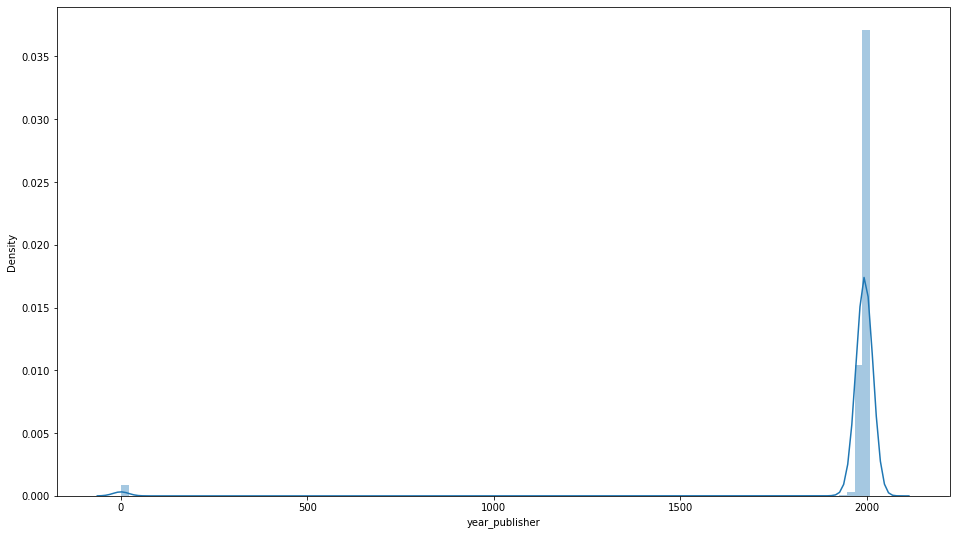

In [ ]:
#Analisando dados demográficos do ano de publicação dos livros

sns.distplot(books['year_publisher'],bins=100);

 - Podemos observar aqui que anos fora do padrão como 0 e 2050 


In [ ]:
books['year_publisher'].describe()

count    271357.000000
mean       1959.760817
std         257.994226
min           0.000000
25%        1989.000000
50%        1995.000000
75%        2000.000000
max        2050.000000
Name: year_publisher, dtype: float64

 - Para isso iremos fazer uma filtragem no periodo de 1950 a 2016

In [ ]:
books = books[(books['year_publisher']>=1950) & (books['year_publisher']<=2016)]

books['year_publisher'].describe()

count    266429.000000
mean       1993.759883
std           7.873026
min        1950.000000
25%        1989.000000
50%        1996.000000
75%        2000.000000
max        2012.000000
Name: year_publisher, dtype: float64

###4.1.2 Avaliação nos dados do usuário, conjunto de dados **users**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



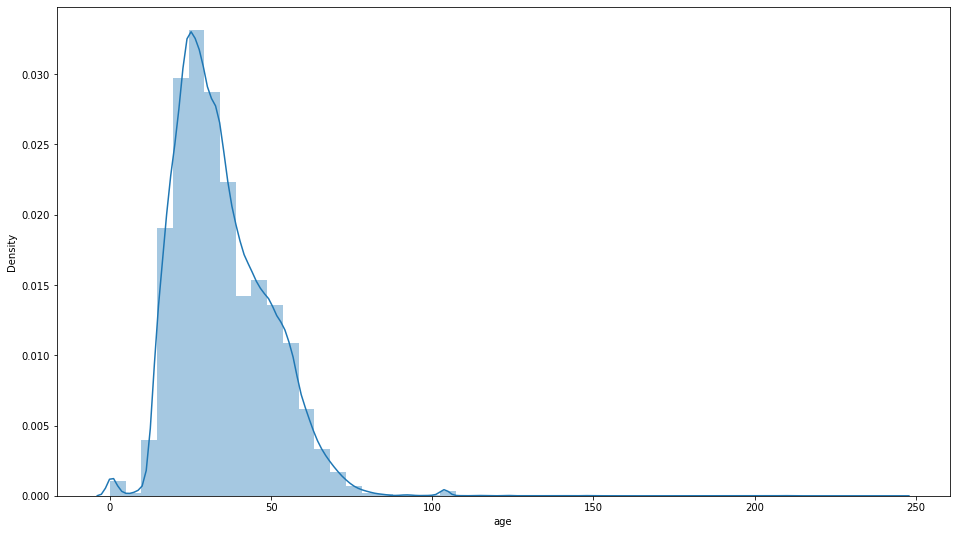

In [ ]:
#Verificando idade de usuários cadastrados

sns.distplot(users.age);

 - Entao vamos filtrar os usuários que possuem idade entre 10 a 90

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



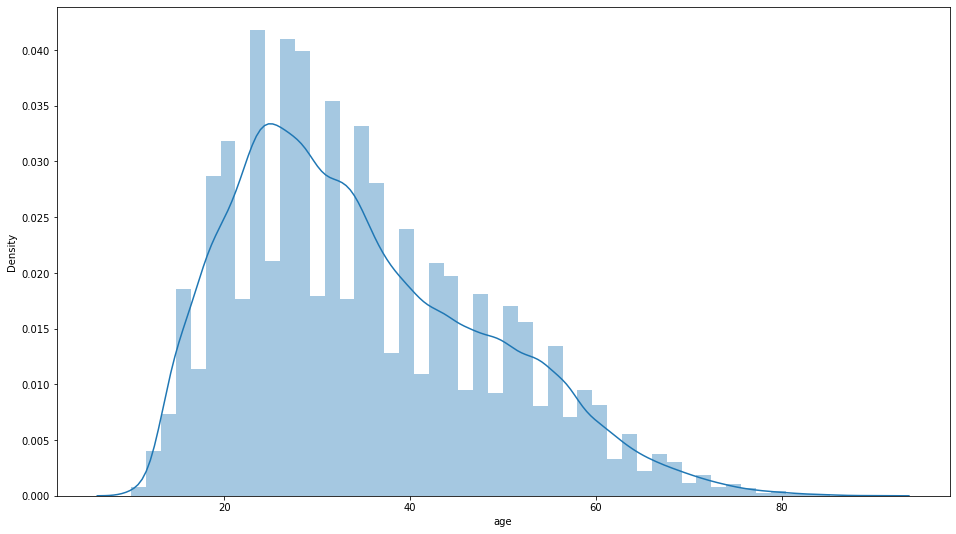

In [ ]:
users = users[(users.age>=10) & (users.age<=90)]
sns.distplot(users.age)

### 4.1.3 Limpando avaliações inoperantes

Não a necessidade de manter os dados de avaliações se não temos os livros e usuários cadastrados.

In [ ]:
print("Avaliações de livros antes da limpeza:",ratings.shape)

#Limpando avaliações pelo ISBN  que não possuem Livros cadastrados
ratings = ratings[ratings['ISBN'].isin(list(books['ISBN'].unique()))]

#Limpando avaliações pelo user_id  que não possuem usuários cadastrados
ratings = ratings[ratings['user_id'].isin(list(users['user_id'].unique()))]

print("Avaliações de livros após limpeza:",ratings.shape)




Avaliações de livros antes da limpeza: (1149780, 3)
Avaliações de livros após limpeza: (734564, 3)


## 4. 2 Descrição e Exploração de informações
(Observação: Nessa fase do projeto  a partir do **4.2.4** irei tratar os problemas separadamente. Para facilitar na organização do projeto.

###4.2.1 Criando o campo de quantidade de avaliações por livros

In [ ]:
# Pegando a quantidade de avaliações por 'ISBN'
var_qtd_ratings =  ratings.groupby('ISBN')['rating'].count()
# Alterei o index para mesclar a nova coluna com a tabela.
ratings = ratings.set_index('ISBN')

 - Nesse ponto juntei o campo qtd_ratings com o nosso conjuntos de dados ratings

In [ ]:
#Criando coluna de quantidade de avaliações por livro
ratings['qtd_ratings'] = var_qtd_ratings


###4.2.2 Regra de negócio: Manter os usuários que avaliaram mais de 50 livros e menos de 250 livros
O limite de 250 foi usado para normalizar os dados para facilitar e explicitar os grupos(Remoção do outliers)
  - Com isso iremos excluir o valor anômalo sem causar grandes prejuízos à análise de dados e observar a quantidade após filtragem


In [ ]:
print("Antes de limpar o conjunto de dados ratings: ",ratings.shape)
val = ratings['user_id'].value_counts()
list_to_keep = list(val[(val>50) & (val<250)].index)
ratings = ratings[ratings['user_id'].isin(list_to_keep)]
print("Depois de limpar o conjunto de dados ratings: ",ratings.shape)

Antes de limpar o conjunto de dados ratings:  (734564, 3)
Depois de limpar o conjunto de dados ratings:  (193885, 3)


In [ ]:
ratings.reset_index(inplace=True)
ratings['qtd_ratings'].unique()

array([ 134,   21,   18,   13,   14,    2,    4,   20,    1,  912,   45,
          3,  689,   11,   10,   27,   28,    6,    8,   23,   40,  359,
       2131,    9,   17,    7,   12,    5,   62,   46,  139,   16,   34,
         15,  120,  206,   24,   44,   31,  113,   84,   64,   25,   59,
        110,  266,  178,   42,  101,   55,   56,   19,  260,  127,  137,
        144,   67,   82,   85,   39,  183,   29,   22,  221,   47,  338,
        204,   41,  149,  185,   36,   26,   37,   70,  214,  230,   73,
         65,   68,  128,  253,  275,  173,  136,  108,  329,   38,  100,
         33,  354,  174,   75,   74,  147,   91,   94,  187,   93,   48,
         30,  175,   35,   83,  118,   78,  181,   49,  470,  398,   57,
        271,  168,   72,  250,   32,   99,   98,   69,   86,   95,  506,
        318,  257,  102,  336,  405,   60,   50,  370,  129,  109,   87,
         43,  200,  161,   54,  307,  191,  194,   92,  152,  165,   88,
        407,   53,  188,  143,   81,  293,   58,  1

### 4.2.3 - Vamos descartar os valores duplicados

In [ ]:
#Vamos descartar os valores duplicados, porque não queremos que o usuário faça mais de uma avaliação por livro.


print("Quantidade antes de limpar os valores duplicados dos ratings: ",ratings.shape)
ratings.drop_duplicates(['user_id', 'ISBN'], inplace=True)
ratings.shape
print("Quantidade depois de limpar os valores duplicados dos ratings: ",ratings.shape)

Quantidade antes de limpar os valores duplicados dos ratings:  (193885, 4)
Quantidade depois de limpar os valores duplicados dos ratings:  (193885, 4)


###4.2.4 Para o primeiro problema utilizando o algoritimo NearestNeighbors
Vamos criar algumas condições exclusivas para tratar o primeiro problema proposto. Lembrando para o primeiro problema iremos construir uma máquina que com base nas escolhas de leituras de outras pessoas, o livro seja recomendado a outras pessoas com interesse semelhante. 
	
  - Para nossa primeira solução iremos recomendar o livro avaliado pela pessoa que avaliou também o livro escolhido por você.


#### 4.2.4.1 Para essa solução irei unir as tabelas ratings e books

In [ ]:
rating_with_books =  ratings.merge(books, on= 'ISBN', )

 - Visualizando dados da nova tabela rating_with_books

In [ ]:
rating_with_books.loc[rating_with_books.author == "Luther Blissett",:].head(5)

,ISBN,user_id,rating,qtd_ratings,title,author,year_publisher,publisher,language,description,genres
78,0151010633,276925,0,20,Q,Luther Blissett,2004,Harcourt,eng,"<div>In 1517, Martin Luther nails his ninety-f...",['Fiction']
79,0151010633,3675,0,20,Q,Luther Blissett,2004,Harcourt,eng,"<div>In 1517, Martin Luther nails his ninety-f...",['Fiction']
80,0151010633,13093,0,20,Q,Luther Blissett,2004,Harcourt,eng,"<div>In 1517, Martin Luther nails his ninety-f...",['Fiction']
81,0151010633,14079,0,20,Q,Luther Blissett,2004,Harcourt,eng,"<div>In 1517, Martin Luther nails his ninety-f...",['Fiction']
82,0151010633,38281,0,20,Q,Luther Blissett,2004,Harcourt,eng,"<div>In 1517, Martin Luther nails his ninety-f...",['Fiction']


#### 4.2.4.2 Regra de negócio - Vamos pegar os livros mais populares que tenham  30 ou mais avaliações.

In [ ]:
rating_with_books = rating_with_books[rating_with_books['qtd_ratings'] >= 30]

 - Validando quantidade de linhas 

In [ ]:
rating_with_books.shape

(51379, 11)

In [ ]:
rating_with_books = rating_with_books[['ISBN', 'user_id', 'rating', 'qtd_ratings', 'title','publisher','year_publisher']]

####4.2.4.3 Pivo_table - Tabela dinâmica
Criaremos uma tabela dinâmica onde as colunas serão ids de usuário, o índice será o título do livro e o valor será classificações. E o id de usuário que não avaliou nenhum livro terá valor como NAN, então coloquei como zero.

In [ ]:
%%time
book_pivot = rating_with_books.pivot_table(columns='user_id', index='title', values='rating')
#Transformando dados null em 0
book_pivot.fillna(0, inplace=True)

CPU times: user 165 ms, sys: 35 ms, total: 200 ms
Wall time: 198 ms


In [ ]:
book_pivot.head(4)

user_id,638,643,741,882,929,1211,1435,1674,1733,1848,...,276929,277157,277195,277478,277928,278026,278137,278144,278188,278843
title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4.2.5 -  Para segunda solução utilizando  (PCA e Kmeas)

Vamos criar algumas condições exclusivas para tratar o segundo problema proposto. Lembrando para o segundo problema iremos criar uma máquina de aprendizagem não-supervisionado utilizando K-means e PCA. A forma para identificar se o usuário gosta do livro é se ele avaliou o mesmo acima da média de suas avaliações. Iremos agrupar os perfis semelhantes de comportamento de avaliações dos livros, para listar os livros com melhores avaliações dos usuários de acordo com o perfil de cada usuário

 - Se uma pessoa avaliar um livro mais do que sua classificação média, então ela gosta do livro. 


####4.2.5.1 Criando a variável da média de avaliação por usuário


 - Criando coluna e incluindo média geral no nosso conjunto de dados: ratings



In [ ]:
# Criando média de avaliações por usuário 
v_rating_mean = ratings.groupby('user_id')['rating'].mean()
# Alterei o index para mesclar a coluna com o df ratings.
ratings = ratings.set_index('user_id')
# Criando coluna de média de avaliações no df ratings.
ratings['mean_rating'] = v_rating_mean
#Retomado indice padrão
ratings.reset_index(inplace=True)
ratings.head(3)

,user_id,ISBN,rating,qtd_ratings,mean_rating
0,276925,002542730X,10,134,1.26506
1,276925,0060520507,0,21,1.26506
2,276925,0060930934,0,18,1.26506


#### 4.2.5.2 - Filtrando as avaliações do livros que possuirem o valor acima da média da avaliação do usuário.

In [ ]:
print("Qtd do Conjunto de dados ratings antes de limpar: ",ratings.shape)
ratings = ratings[ratings['rating'] > ratings['mean_rating']]
print("Depois de limpar o conjunto de dados ratings: ",ratings.shape)

Qtd do Conjunto de dados ratings antes de limpar:  (193885, 5)
Depois de limpar o conjunto de dados ratings:  (69855, 5)


- Pegando somente os dados que iremos utilizar 

In [ ]:
# Inicializando uma variável fictícia para uso futuro
user_rating = ratings[['ISBN', 'user_id', 'rating', 'mean_rating']]
user_rating['is_fav'] = 1
print(user_rating.shape)
user_rating.head()

(69855, 5)


,ISBN,user_id,rating,mean_rating,is_fav
0,002542730X,276925,10,1.26506,1
4,0140154078,276925,6,1.26506,1
10,0194216748,276925,5,1.26506,1
15,0385504209,276925,8,1.26506,1
22,0553275283,276925,8,1.26506,1


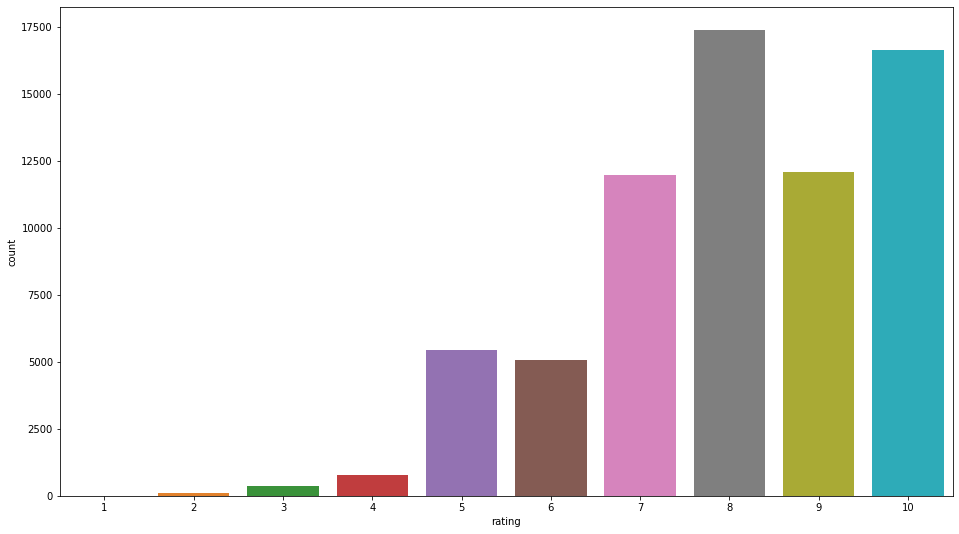

In [ ]:
#plotting count of bookRating - ESTATÍSTICA DESCRITIVA PARA CONFIRMAR OS DADOS FINAIS.

sns.countplot(data=user_rating , x='rating')
plt.show();

####4.2.5.3 Pivo_table - para transpor os livros em coluna ao inves de linhas.
tabela dinâmica onde as colunas serão os ids dos livros ‘ISBN’, o índice será o id do usuário

In [ ]:
%%time
df = pd.pivot_table(user_rating,index='user_id',columns='ISBN',values='is_fav')
df.fillna(value=0,inplace=True)
print(df.shape)
df.head(10)

(1763, 43397)
CPU times: user 1.24 s, sys: 846 ms, total: 2.09 s
Wall time: 2.09 s


In [ ]:
df.head(2)

ISBN,0001048082,0001360469,0001374362,0001374869,000160418X,0001935968,0001941941,0001941968,0001981307,0001981625,...,9997412958,B00007MF56,B00009EF82,B00009NDAN,B0000AZW79,B0000DAPP1,B0000T6KIM,B0000VZEH8,B00011SOXI,B0001GMSV2
user_id,,,,,,,,,,,,,,,,,,,,,
638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#5. Criação de Modelos de Machine Learning

###5.1 Busca colaborativa com NearestNeighbors

Esse algoritmo NearestNeighbors é utilizada para medir a distância.
Então irei utilizar essa técnica para gerar scores para sugestões de livros. 

Irei treinar o algoritmo dos vizinhos mais próximos. aqui precisamos especificar um algoritmo que é ‘brute’ significa encontrar a distância de cada ponto a todos os outros pontos. E especificamos a métrica como um cosseno, para que o algoritmo calcule a similaridade do cosseno entre os vetores de classificação. 




In [ ]:
book_sparse = csr_matrix(book_pivot)


In [ ]:
model = NearestNeighbors( algorithm = 'brute', metric='cosine')
model.fit(book_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

####5.1.1 Previsão 1 - Testando

Vamos fazer duas previsões e ver se está sugerindo livros ou não. 
Para isso estou escolhendo o index (794) o livro: Harry Potter and the Goblet of Fire (Book 4)

Iremos fazer um loop pegando as distancias mais próximas do livro escolhido.

In [ ]:
#Testando nosso modelo de recomendação
##query_index = np.random.choice(book_pivot.shape[0])
distances, indices = model.kneighbors(book_pivot.iloc[794, :].values.reshape(1, -1), n_neighbors = 6)
v_array_livro = []
v_array_dist = []


for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recomendações para {0}:\n'.format(book_pivot.index[794]))
        livro_selecionado = (book_pivot.index[794])
    else:
      
        v_array_livro.append(book_pivot.index[indices.flatten()[i]])
        v_array_dist.append(distances.flatten()[i])
        print('{0}: {1}'.format(i, book_pivot.index[indices.flatten()[i]]))
       

Recomendações para Harry Potter and the Goblet of Fire (Book 4):

1: Harry Potter and the Prisoner of Azkaban (Book 3)
2: Harry Potter and the Chamber of Secrets (Book 2)
3: Harry Potter and the Order of the Phoenix (Book 5)
4: Harry Potter and the Sorcerer's Stone (Book 1)
5: Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))


#####5.1.1.1 Nesse ponto estou criando gráfico para avaliarmos o segundo teste dos livros e verificarmos a distância dos livros . 

Quanto mais próximo do zero o livro esta mais próximo do indicado.

In [ ]:
 df_livro_distancia = pd.DataFrame(v_array_livro,  columns=['title'])
 df_livro_distancia ['distant'] = v_array_dist
 

 # plotando gráfico de barras verticais
trace0 = go.Bar(y=df_livro_distancia.title,
                x=df_livro_distancia.distant ,
                marker = {'color': '#00FF2b'},
                orientation='h',
                opacity= 0.7
              )

data = [trace0]

# criando layout
configuracoes_layout = go.Layout(title=f'Recomendações para: {livro_selecionado}',
                   xaxis=dict(
                         titlefont=dict(
                                   size=40,
                                   color='lightgrey'),
                   tickangle=90),
                   yaxis={'title': 'livros'})

# figura

fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico
py.iplot(fig)

#### 5.1.2 Previsão 2 - Testando

Vamos fazer a segunda previsão e ver se está sugerindo livros ou não. 
Para isso estou escolhendo o index (958) o livro: Jurassic Park

Iremos fazer um loop pegando as distâncias mais próximas do livro escolhido.

In [ ]:
#Testando nosso modelo de recomendação
##query_index = np.random.choice(book_pivot.shape[0])
distances, indices = model.kneighbors(book_pivot.iloc[958, :].values.reshape(1, -1), n_neighbors = 6)
v_array_livro = []
v_array_dist = []


for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recomendações para {0}:\n'.format(book_pivot.index[958]))
        livro_selecionado = (book_pivot.index[958])
    else:
      
        v_array_livro.append(book_pivot.index[indices.flatten()[i]])
        v_array_dist.append(distances.flatten()[i])
        print('{0}: {1}'.format(i, book_pivot.index[indices.flatten()[i]]))
       

Recomendações para Jurassic Park:

1: Strange Highways
2: The Terminal Man
3: Red Dragon
4: Silence of the Lambs
5: Lord of Chaos (The Wheel of Time, Book 6)


#####5.1.2.1 Nesse ponto estou criando gráfico para avaliarmos o segundo teste dos livros e verificarmos a distância dos livros . 

Quanto mais próximo do zero o livro esta mais próximo do indicado.

In [ ]:
 df_livro_distancia = pd.DataFrame(v_array_livro,  columns=['title'])
 df_livro_distancia ['distant'] = v_array_dist
 

 # plotando gráfico de barras verticais
trace0 = go.Bar(y=df_livro_distancia.title,
                x=df_livro_distancia.distant ,
                marker = {'color': '#00FF2b'},
                orientation='h',
                opacity= 0.7
              )

data = [trace0]

# criando layout
configuracoes_layout = go.Layout(title=f'Recomendações para: {livro_selecionado}',
                   xaxis=dict(
                         titlefont=dict(
                                   size=40,
                                   color='lightgrey'),
                   tickangle=90),
                   yaxis={'title': 'livros'})

# figura

fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico
py.iplot(fig)

###5.2 Busca colaborativa com K-MEANS e PCA

Calcularemos os vizinhos mais próximos usando o algoritmo Brute e especificamos a métrica como um cosseno, para que o algoritmo calcule a similaridade do cosseno entre os vetores de classificação. Ajustando o modelo...

In [ ]:
print(df.shape) 
df.head(2)

(1763, 43397)


ISBN,0001048082,0001360469,0001374362,0001374869,000160418X,0001935968,0001941941,0001941968,0001981307,0001981625,...,9997412958,B00007MF56,B00009EF82,B00009NDAN,B0000AZW79,B0000DAPP1,B0000T6KIM,B0000VZEH8,B00011SOXI,B0001GMSV2
user_id,,,,,,,,,,,,,,,,,,,,,
638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 - Aplicando o PCA
 
  Para esse problema iremos utilizar o PCA, onde o  mesmo é uma técnica de Apredizagem não supervisionada utilizada para reduzir a dimensionalidade dos dados.
Então iremos reduzir todas nossas variáveis em 3 componontes principais, a transformação é realizada por meio de Matemática(Algebra) e com isso juntamos as variáveis de acordo sua semelhança entre si, essa semelhança e medida por variança.


In [ ]:
# Aplica redução de dimensionalidade das variáveis 
%%time
pca = PCA(n_components=3) # 3 componentes
pca.fit(df)
pca_fit = pca.transform(df) # Realiza o fitTransforme com nossa tabela

CPU times: user 10.5 s, sys: 2.4 s, total: 12.9 s
Wall time: 7.38 s


 Depois de ajustar um objeto PCA à matriz padronizada, podemos ver quanto da variação é explicada por cada uma das características.

In [ ]:
pca_fit = pd.DataFrame(pca_fit,index=df.index)
pca_fit.head(5)

,0,1,2
user_id,,,
638,0.785647,-0.379603,-0.222375
643,-0.270258,0.052966,-0.068051
741,-0.245985,0.031787,-0.065674
882,0.135125,0.023742,-0.058986
929,-0.163483,0.014566,-0.030488


Nessa etapa usei o K-Means para criar os grupos com os nossos dados e dividir os livros. Dei início na criação de 3 cluster para visualizarmos os três componentes principais separados por grupos pelo K-means e ter uma visão dos dados de cada componente.

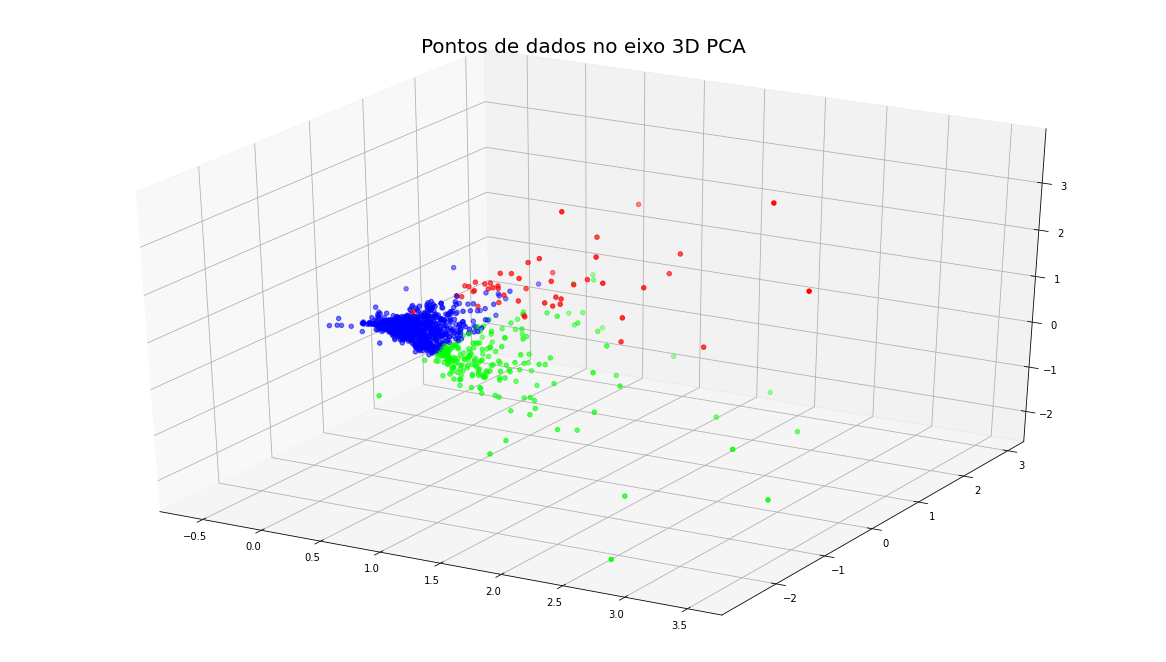

In [ ]:
Kmm = KMeans(n_clusters=3)
plt.rcParams['figure.figsize'] = (16, 9)
clusters = Kmm.fit_predict(pca_fit)
cmhot = plt.get_cmap('brg')
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(pca_fit[0], pca_fit[2], pca_fit[1],c=clusters,cmap=cmhot)
plt.title('Pontos de dados no eixo 3D PCA', fontsize=20)
plt.show()

Testando o Metodo Elbow que irá testar a variância dos dados em relação ao número de clusters. A partir do valor indicado pelo “cotovelo” no gráfico significa que não existe ganho em relação ao aumento de clusters.

Text(0, 0.5, '%Variança para cada valor de K')

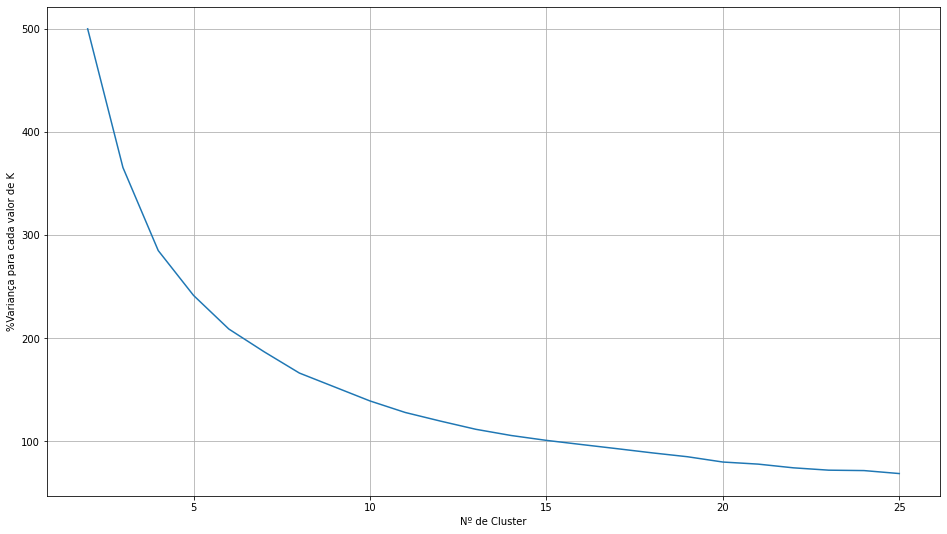

In [ ]:
# O Elbow Method

TSS = []
for i in range(2,26):
    km = KMeans(n_clusters=i,random_state=0)
    km.fit(pca_fit)
    TSS.append(km.inertia_)
plt.plot(range(2,26),TSS,'-')
plt.grid(True)
plt.xlabel('Nº de Cluster')
plt.ylabel('%Variança para cada valor de K')

Não consegui um cotovelo claro, então resolvi utilizar o método Silhouette Analysis que faz o cálculo da distância dentro do cluster e a distância entre os clusters, para cada observa-ção. Para isso verifiquei de 3 a 8 clusters, onde no gráfico acima havia mostrado um melhor ganho. 

Para  n_clusters = 3 A média silhouette_score é : 0.622269236129077
Para  n_clusters = 4 A média silhouette_score é : 0.6259850291585043
Para  n_clusters = 5 A média silhouette_score é : 0.5256667244211073
Para  n_clusters = 6 A média silhouette_score é : 0.5393076856430926
Para  n_clusters = 7 A média silhouette_score é : 0.4728582810583427
Para  n_clusters = 8 A média silhouette_score é : 0.48434394538268494


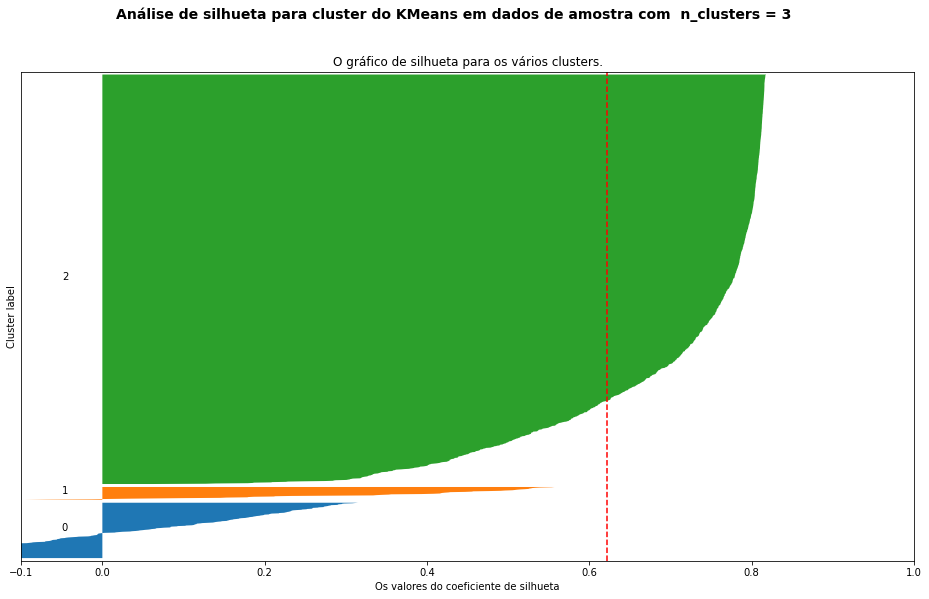

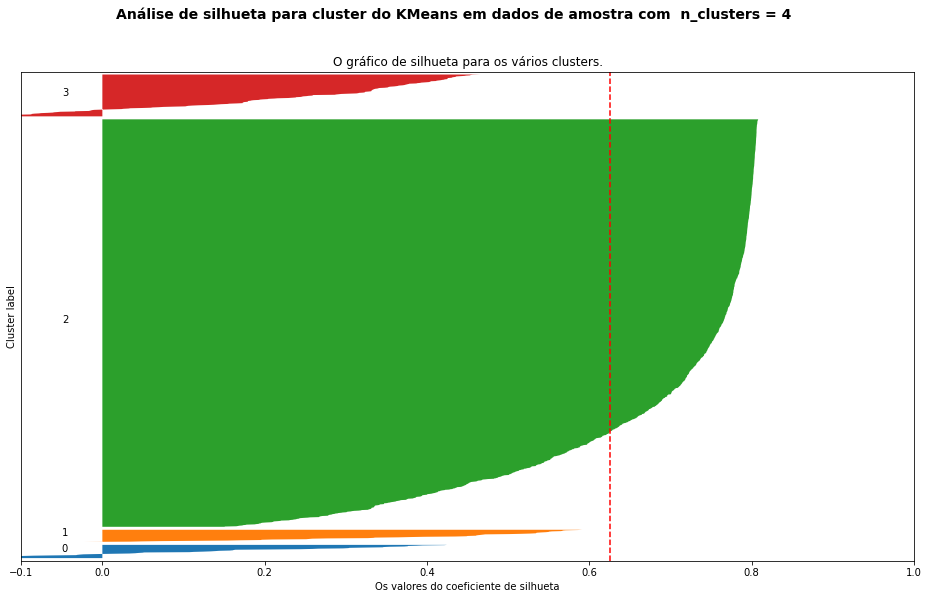

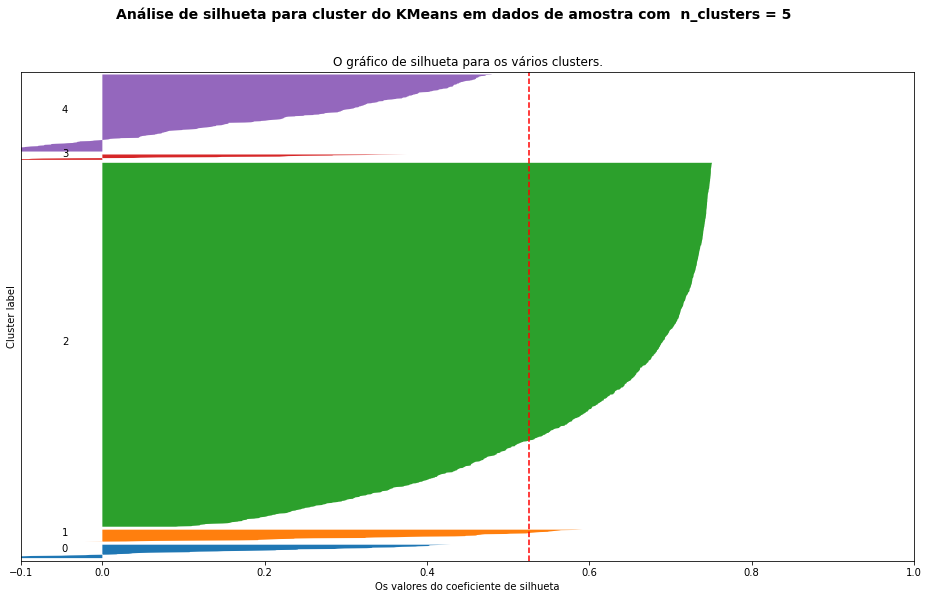

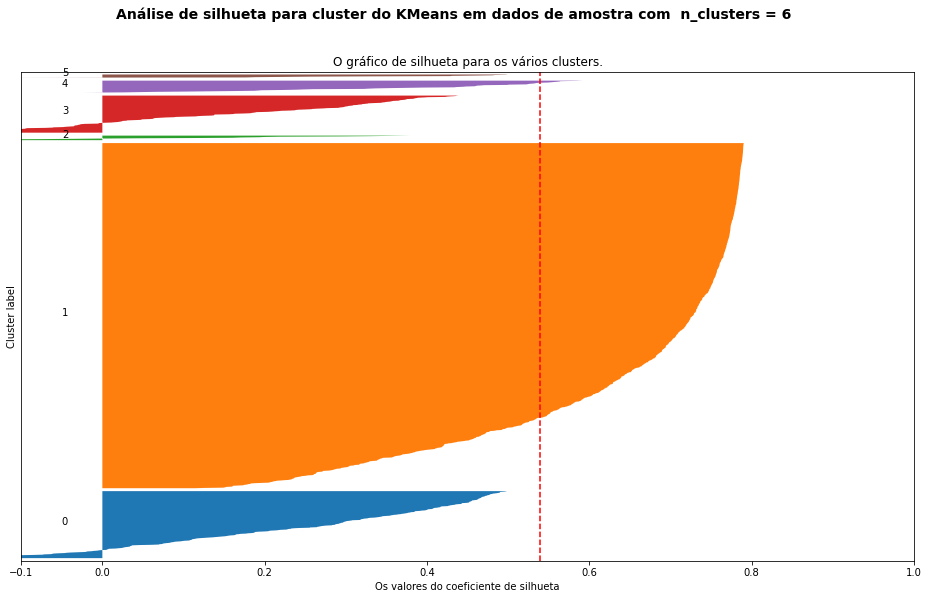

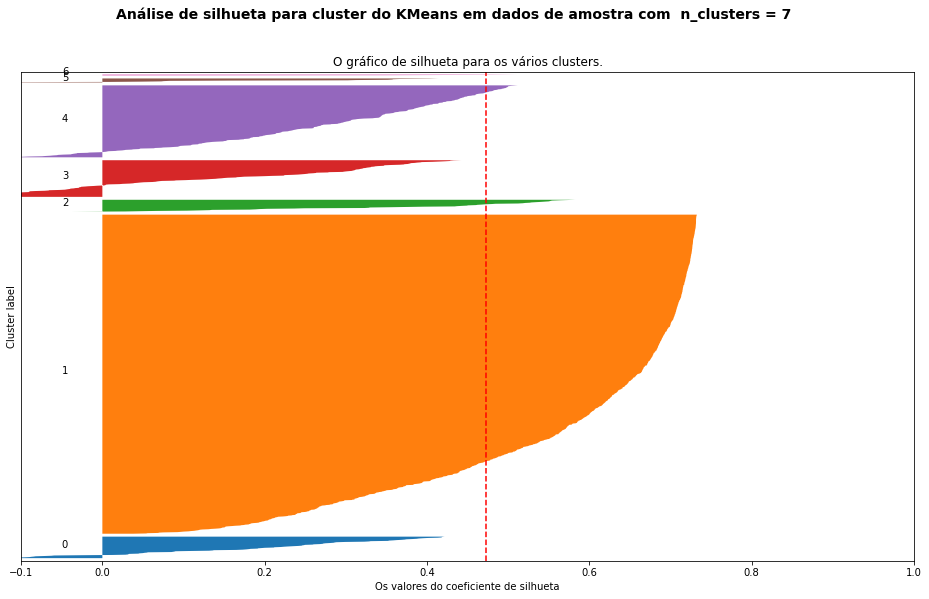

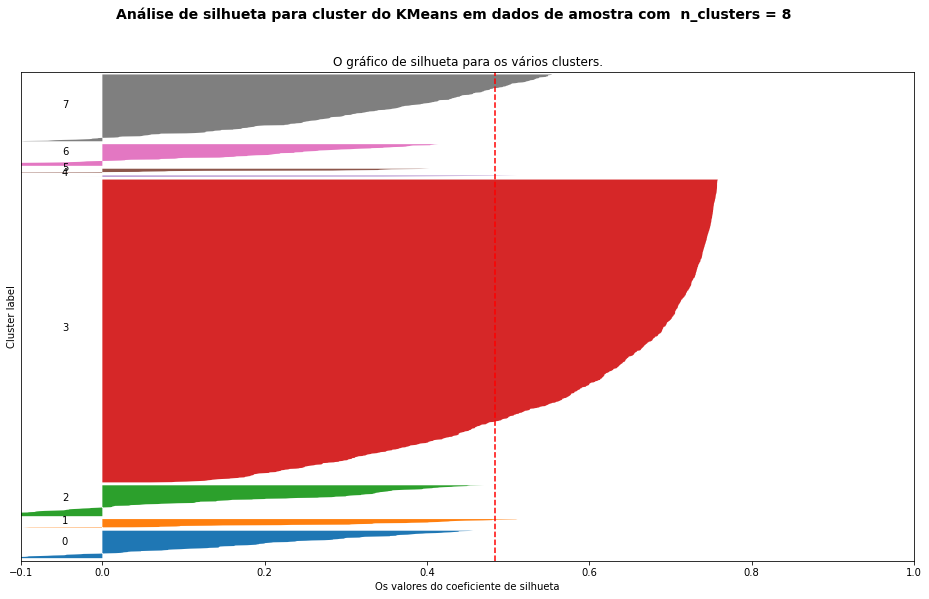

In [ ]:
for n in [3,4,5,6,7,8]:
    ax1 = plt.figure().gca()
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(pca_fit) + (n + 1) * 10])
    km = KMeans(n_clusters=n,random_state=0)
    clusters = km.fit_predict(pca_fit)
    silhouette_avg = silhouette_score(pca_fit, clusters)
    print("Para  n_clusters =", n,
          "A média silhouette_score é :", silhouette_avg)
    silhouette_values = silhouette_samples(pca_fit, clusters)
    y_start = 10
    for i in range(n):
        ith_cluster = np.sort(silhouette_values[clusters==i])
        cluster_size = ith_cluster.shape[0]
        y_end = y_start + cluster_size 
        ax1.fill_betweenx(np.arange(y_start, y_end),
                          0, ith_cluster)
        ax1.text(-0.05, y_start + 0.5 * cluster_size, str(i))
        y_start = y_end + 10
    ax1.set_title("O gráfico de silhueta para os vários clusters.")
    ax1.set_xlabel("Os valores do coeficiente de silhueta")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.suptitle(("Análise de silhueta para cluster do KMeans em dados de amostra "
                  "com  n_clusters = %d" % n),
                 fontsize=14, fontweight='bold')
plt.show()

Identificamos que K = 4 fornece o melhor clustering 

Identificado a quantidade de cluster, iremos definir a quantidade de clusters no KMeans criei um gráfico para mostrar os quatro grupos e obtive os livros e usuarios para cada Cluster

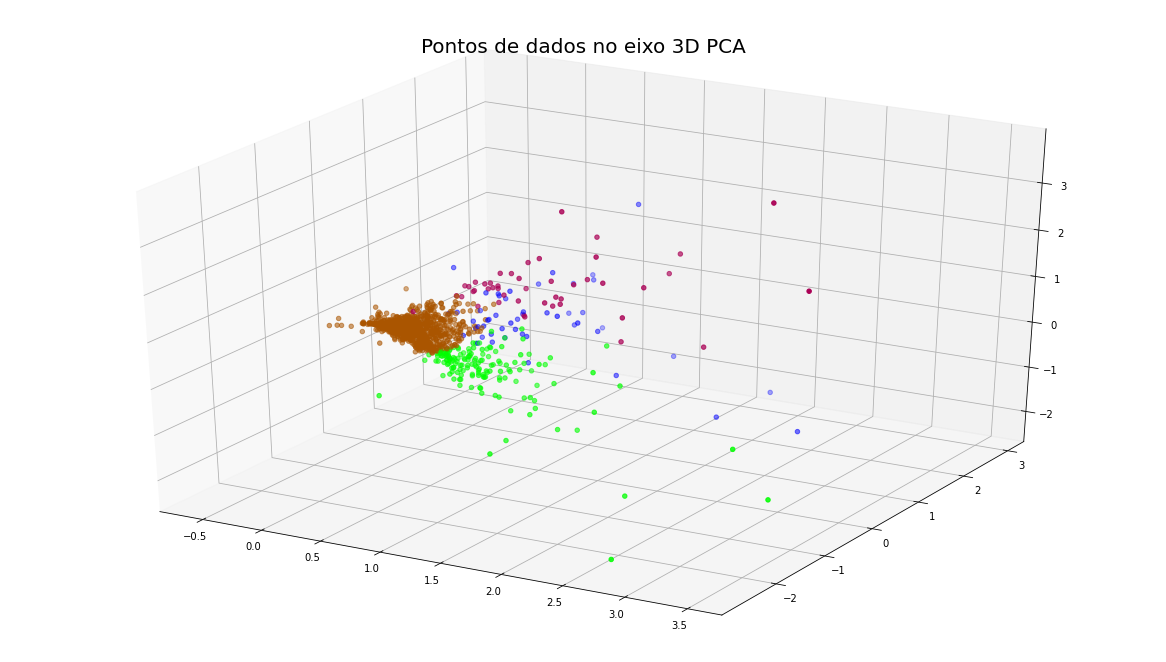

In [ ]:
Kmeans_final = KMeans(n_clusters=4,random_state=0).fit(pca_fit)
df['cluster'] = Kmeans_final.labels_
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(pca_fit[0], pca_fit[2], pca_fit[1],c=df['cluster'],cmap=cmhot)
plt.title('Pontos de dados no eixo 3D PCA', fontsize=20)
plt.show()
# Obtendo os livros para cada cluster
cl1_books = df[df.cluster == 0].mean()
cl2_books = df[df.cluster == 1].mean()
cl3_books = df[df.cluster == 2].mean()
cl4_books = df[df.cluster == 3].mean()
# Obtendo os usuarios para cada cluster
cl1_users = df[df.cluster == 0].index
cl2_users = df[df.cluster == 1].index
cl3_users = df[df.cluster == 2].index
cl4_users = df[df.cluster == 3].index

#### 5.2.1 Testando o Cluster 1 e Avaliando resultado

Vamos fazer uma previsão no cluster um e ver se está sugerindo livros ou não, imprimiremos os 5 principais livros e autores. 

Para isso iremos retornar os 5 tops livros da lista do cluster 1.

In [ ]:
result_isbn = []
def cluster_books_des(Ser):
    bks = pd.DataFrame(Ser).merge(books,left_index=True,right_on='ISBN',how='left')
    bks.rename(columns={0:'avg_score'},inplace=True)
    bks.sort_values(by='avg_score',ascending=False,inplace=True)
    print('Media de ano de Publicação:',int(bks['year_publisher'].median()))
    print('\nTop 5 Livros\n')
    Top5_books = bks.index[:5]
    for i,isbn in enumerate(Top5_books):
        print(str(i+1)+'.',bks.loc[isbn]['title'])
        result_isbn.append(bks.loc[isbn]['ISBN'])
    Top5_authors = bks['author'].unique()[:5]
    print('\n--------------\n')
    print('\nTop 5 Autores\n')

    for i,auth in enumerate(Top5_authors):
       if auth is not "nan":
          print(str(i+1)+'.',auth)
cluster_books_des(cl1_books)

df_result = pd.DataFrame(result_isbn, columns=['ISBN'])

Media de ano de Publicação: 1997

Top 5 Livros

1. Jurassic Park
2. A Time to Kill
3. Red Dragon
4. Angels &amp; Demons
5. Dolores Claiborne

--------------


Top 5 Autores

1. Michael Crichton
2. JOHN GRISHAM
3. Thomas Harris
4. Dan Brown
5. Stephen King


#####5.2.1.1 Gráfico que retorna a quantidade de avaliações por livro.

- Nesse ponto eu pego o resultado dos livros do cluster 1 e verifico a quantidade e a média de avaliações por livro

In [ ]:
valid_qtd_mean = df_result.merge(ratings, on='ISBN')
v_qtd_livro = valid_qtd_mean.groupby('ISBN')['rating'].count()
v_media_livro = valid_qtd_mean.groupby('ISBN')['rating'].mean()

result_top5 =  df_result.merge(books, on='ISBN')
result_top5
v_qtd_livro
result_top5 = result_top5.set_index('ISBN')

#Criando coluna de media de avaliação e atribuindo o valor da media
result_top5['media_livro'] = v_media_livro

#Criando coluna de quantidade de avaliação e atribuindo na tabela user_rating
result_top5['qtd_rating'] = v_qtd_livro

#Retomado indice padrao
result_top5.reset_index(inplace=True)

 - Plotando o grafico de quantidade de avaliações recebida por livro.

In [ ]:
# plotando gráfico de barras verticais
trace0 = go.Bar(y=result_top5.title,
                x=result_top5.qtd_rating ,
                marker = {'color': '#00FF2b'},
                orientation='h'
              )

data = [trace0]

# criando layout
configuracoes_layout = go.Layout(title='Quantidade de Avaliação dos tops 5 Livros',
                   xaxis=dict(
                         titlefont=dict(
                                   size=40,
                                   color='lightgrey'),
                   tickangle=90),
                   yaxis={'title': 'livros'})

# figura

fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico
py.iplot(fig)

Plotando Grafico de média de avaliações recebida por livro.

In [ ]:
data = [go.Bar(y=result_top5.title,
               x=result_top5.media_livro ,
               marker = {'color': 'lightblue',
                         'line': {'color': '#333',
                                 'width': 2}
                        },
               orientation='h',
               opacity= 0.7
              )
       ]

# layout
configuracoes_layout = go.Layout(title='Media de Avaliações dos livros',
                                 yaxis={'title':'Livros avaliados'},
                                 xaxis={'title': 'Media de avaliações dos livros'},
                                 # texto na barra de destaque
              
                                                                                              
                                )

# figura

fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico
py.iplot(fig, filename='Mes destaque de vendas')


Média de idade dos usuarios que avaliou o livro

Most Common Location: hawthorne, new jersey, usa

Mean Age: 35.1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



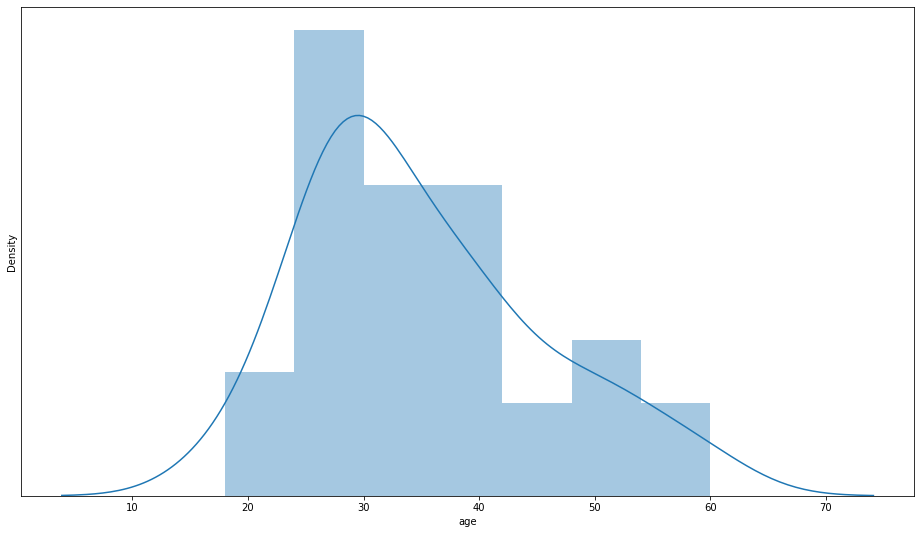

In [ ]:
def cluster_user_des(Ser):
    cl_user = users[users['user_id'].isin(list(Ser))]
    print('Most Common Location:',cl_user['location'].mode()[0])
    print('\nMean Age:',cl_user['age'].mean())
    sns.distplot(cl_user['age'])
    plt.yticks([])
cluster_user_des(cl1_users)

#### 5.2.2 Testando o Cluster 2 e Avaliando resultado

Vamos fazer uma previsão no cluster 2 e ver se está sugerindo livros ou não, imprimiremos os 5 principais livros e autores. 

Para isso iremos retornar os 5 tops livros da lista do cluster 2.

In [ ]:
result_isbn = []
def cluster_books_des(Ser):
    bks = pd.DataFrame(Ser).merge(books,left_index=True,right_on='ISBN',how='left')
    bks.rename(columns={0:'avg_score'},inplace=True)
    bks.sort_values(by='avg_score',ascending=False,inplace=True)
    print('Media de ano de Publicação:',int(bks['year_publisher'].median()))
    print('\nTop 5 Livros\n')
    Top5_books = bks.index[1:6]
    for i,isbn in enumerate(Top5_books):
        print(str(i+1)+'.',bks.loc[isbn]['title'])
        result_isbn.append(bks.loc[isbn]['ISBN'])
    Top5_authors = bks['author'].unique()[1:6]
    print('\n--------------\n')
    print('\nTop 5 Autores\n')

    for i,auth in enumerate(Top5_authors):
          print(str(i+1)+'.',auth)
cluster_books_des(cl2_books)

df_result = pd.DataFrame(result_isbn, columns=['ISBN'])

Media de ano de Publicação: 1997

Top 5 Livros

1. nan
2. Harry Potter and the Prisoner of Azkaban (Book 3)
3. Harry Potter and the Chamber of Secrets (Book 2)
4. Harry Potter and the Sorcerer's Stone (Book 1)
5. Harry Potter and the Order of the Phoenix (Book 5)

--------------


Top 5 Autores

1. nan
2. J. K. Rowling
3. J.D. Salinger
4. Harper Lee
5. Lemony Snicket


#####5.2.2.1 Gráfico que retorna a quantidade de avaliações por livro.

- Nesse ponto eu pego o resultado dos livros do cluster 2 e verifico a quantidade e a média de avaliações por livro

In [ ]:
valid_qtd_mean = df_result.merge(ratings, on='ISBN')
v_qtd_livro = valid_qtd_mean.groupby('ISBN')['rating'].count()
v_media_livro = valid_qtd_mean.groupby('ISBN')['rating'].mean()

result_top5 =  df_result.merge(books, on='ISBN')
result_top5
v_qtd_livro
result_top5 = result_top5.set_index('ISBN')

#Criando coluna de media de avaliação e atribuindo o valor da media
result_top5['media_livro'] = v_media_livro

#Criando coluna de quantidade de avaliação e atribuindo na tabela user_rating
result_top5['qtd_rating'] = v_qtd_livro

#Retomado indice padrao
result_top5.reset_index(inplace=True)

 - Plotando o grafico de quantidade de avaliações recebida por livro.

In [ ]:
# plotando gráfico de barras verticais
trace0 = go.Bar(y=result_top5.title,
                x=result_top5.qtd_rating ,
                marker = {'color': '#00FF2b'},
                orientation='h'
              )

data = [trace0]

# criando layout
configuracoes_layout = go.Layout(title='Quantidade de Avaliação dos tops 5 Livros',
                   xaxis=dict(
                         titlefont=dict(
                                   size=40,
                                   color='lightgrey'),
                   tickangle=90),
                   yaxis={'title': 'livros'})

# figura

fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico
py.iplot(fig)

Plotando Grafico de média de avaliações recebida por livro.

In [ ]:
data = [go.Bar(y=result_top5.title,
               x=result_top5.media_livro ,
               marker = {'color': 'lightblue',
                         'line': {'color': '#333',
                                 'width': 2}
                        },
               orientation='h',
               opacity= 0.7
              )
       ]

# layout
configuracoes_layout = go.Layout(title='Media de Avaliações dos livros',
                                 yaxis={'title':'Livros avaliados'},
                                 xaxis={'title': 'Media de avaliações dos livros'},
                                 # texto na barra de destaque
              
                                                                                              
                                )

# figura

fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico
py.iplot(fig, filename='Mes destaque de vendas')


Média de idade dos usuarios que avaliou o livro

Most Common Location: edmonton, alberta, canada

Mean Age: 28.804347826086957


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



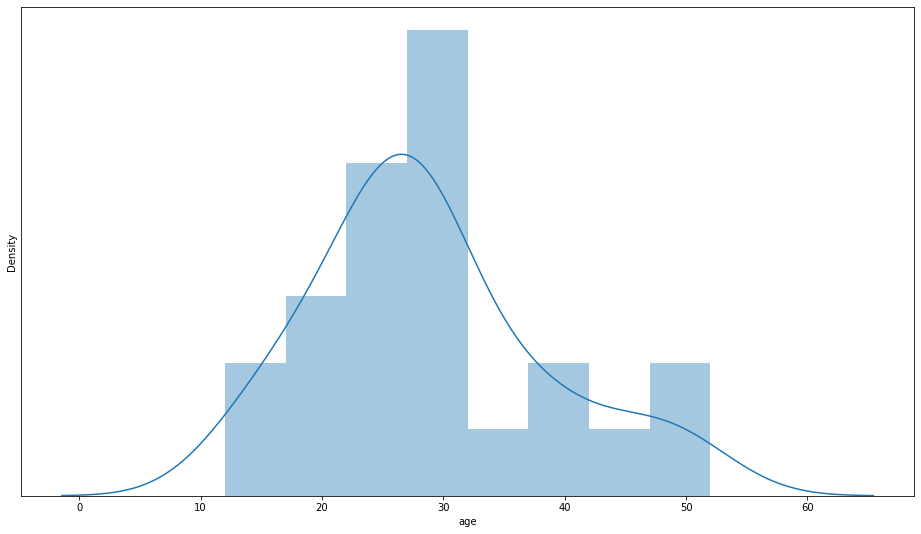

In [ ]:
cluster_user_des(cl2_users)

#### 5.2.3 Testando o Cluster 3 e Avaliando resultado

Vamos fazer uma previsão no cluster 3 e ver se está sugerindo livros ou não, imprimiremos os 5 principais livros e autores. 

Para isso iremos retornar os 5 tops livros da lista do cluster 3.

In [ ]:
result_isbn = []
def cluster_books_des(Ser):
    bks = pd.DataFrame(Ser).merge(books,left_index=True,right_on='ISBN',how='left')
    bks.rename(columns={0:'avg_score'},inplace=True)
    bks.sort_values(by='avg_score',ascending=False,inplace=True)
    print('Media de ano de Publicação:',int(bks['year_publisher'].median()))
    print('\nTop 5 Livros\n')
    Top5_books = bks.index[1:6]
    for i,isbn in enumerate(Top5_books):
        print(str(i+1)+'.',bks.loc[isbn]['title'])
        result_isbn.append(bks.loc[isbn]['ISBN'])
    Top5_authors = bks['author'].unique()[1:6]
    print('\n--------------\n')
    print('\nTop 5 Autores\n')

    for i,auth in enumerate(Top5_authors):
          print(str(i+1)+'.',auth)
cluster_books_des(cl3_books)

df_result = pd.DataFrame(result_isbn, columns=['ISBN'])

Media de ano de Publicação: 1997

Top 5 Livros

1. nan
2. The Da Vinci Code
3. Interview with the Vampire
4. Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
5. Life of Pi

--------------


Top 5 Autores

1. nan
2. Dan Brown
3. Anne Rice
4. J. K. Rowling
5. Yann Martel


#####5.2.3.1 Gráfico que retorna a quantidade de avaliações por livro.

- Nesse ponto eu pego o resultado dos livros do cluster 3 e verifico a quantidade e a média de avaliações por livro

In [ ]:
valid_qtd_mean = df_result.merge(ratings, on='ISBN')
v_qtd_livro = valid_qtd_mean.groupby('ISBN')['rating'].count()
v_media_livro = valid_qtd_mean.groupby('ISBN')['rating'].mean()

result_top5 =  df_result.merge(books, on='ISBN')
result_top5
v_qtd_livro
result_top5 = result_top5.set_index('ISBN')

#Criando coluna de media de avaliação e atribuindo o valor da media
result_top5['media_livro'] = v_media_livro

#Criando coluna de quantidade de avaliação e atribuindo na tabela user_rating
result_top5['qtd_rating'] = v_qtd_livro

#Retomado indice padrao
result_top5.reset_index(inplace=True)

 - Plotando o grafico de quantidade de avaliações recebida por livro.

In [ ]:
# plotando gráfico de barras verticais
trace0 = go.Bar(y=result_top5.title,
                x=result_top5.qtd_rating ,
                marker = {'color': '#00FF2b'},
                orientation='h'
              )

data = [trace0]

# criando layout
configuracoes_layout = go.Layout(title='Quantidade de Avaliação dos tops 5 Livros',
                   xaxis=dict(
                         titlefont=dict(
                                   size=40,
                                   color='lightgrey'),
                   tickangle=90),
                   yaxis={'title': 'livros'})

# figura

fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico
py.iplot(fig)

Plotando Grafico de média de avaliações recebida por livro.

In [ ]:
data = [go.Bar(y=result_top5.title,
               x=result_top5.media_livro ,
               marker = {'color': 'lightblue',
                         'line': {'color': '#333',
                                 'width': 2}
                        },
               orientation='h',
               opacity= 0.7
              )
       ]

# layout
configuracoes_layout = go.Layout(title='Media de Avaliações dos livros',
                                 yaxis={'title':'Livros avaliados'},
                                 xaxis={'title': 'Media de avaliações dos livros'},
                                 # texto na barra de destaque
              
                                                                                              
                                )

# figura

fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico
py.iplot(fig, filename='Mes destaque de vendas')


Média de idade dos usuarios que avaliou o livro

Most Common Location: toronto, ontario, canada

Mean Age: 35.230311052283255


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



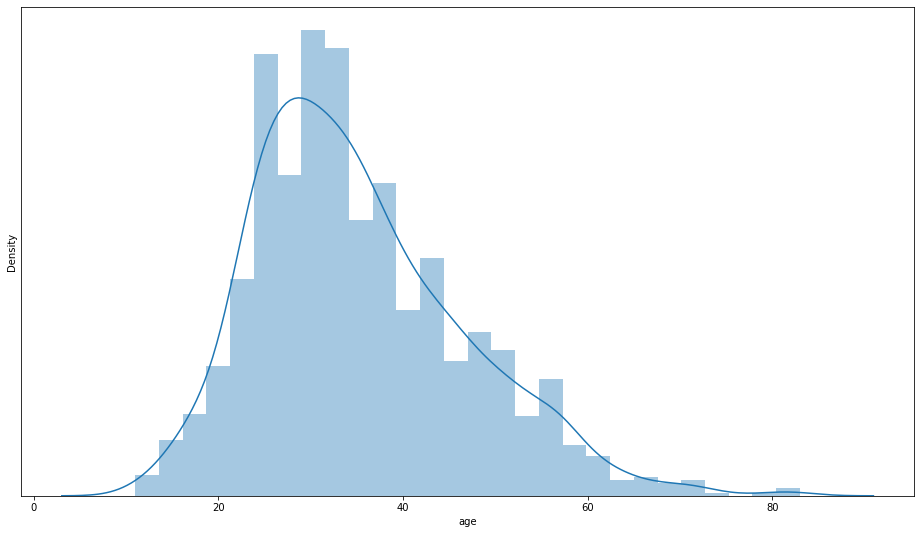

In [ ]:
cluster_user_des(cl3_users)

#### 5.2.4 Testando o Cluster 4 e Avaliando resultado

Vamos fazer uma previsão no cluster 4 e ver se está sugerindo livros ou não, imprimiremos os 5 principais livros e autores. 

Para isso iremos retornar os 5 tops livros da lista do cluster 4.

In [ ]:
result_isbn = []
def cluster_books_des(Ser):
    bks = pd.DataFrame(Ser).merge(books,left_index=True,right_on='ISBN',how='left')
    bks.rename(columns={0:'avg_score'},inplace=True)
    bks.sort_values(by='avg_score',ascending=False,inplace=True)
    print('Media de ano de Publicação:',int(bks['year_publisher'].median()))
    print('\nTop 5 Livros\n')
    Top5_books = bks.index[1:6]
    for i,isbn in enumerate(Top5_books):
        print(str(i+1)+'.',bks.loc[isbn]['title'])
        result_isbn.append(bks.loc[isbn]['ISBN'])
    Top5_authors = bks['author'].unique()[1:6]
    print('\n--------------\n')
    print('\nTop 5 Autores\n')

    for i,auth in enumerate(Top5_authors):
          print(str(i+1)+'.',auth)
cluster_books_des(cl4_books)

df_result = pd.DataFrame(result_isbn, columns=['ISBN'])

Media de ano de Publicação: 1997

Top 5 Livros

1. nan
2. The Lovely Bones: A Novel
3. Where the Heart Is (Oprah's Book Club (Paperback))
4. The Red Tent (Bestselling Backlist)
5. The Secret Life of Bees

--------------


Top 5 Autores

1. nan
2. Alice Sebold
3. Billie Letts
4. Anita Diamant
5. Sue Monk Kidd


#####5.2.4.1 Gráfico que retorna a quantidade de avaliações por livro.

- Nesse ponto eu pego o resultado dos livros do cluster 4 e verifico a quantidade e a média de avaliações por livro

In [ ]:
valid_qtd_mean = df_result.merge(ratings, on='ISBN')
v_qtd_livro = valid_qtd_mean.groupby('ISBN')['rating'].count()
v_media_livro = valid_qtd_mean.groupby('ISBN')['rating'].mean()

result_top5 =  df_result.merge(books, on='ISBN')
result_top5
v_qtd_livro
result_top5 = result_top5.set_index('ISBN')

#Criando coluna de media de avaliação e atribuindo o valor da media
result_top5['media_livro'] = v_media_livro

#Criando coluna de quantidade de avaliação e atribuindo na tabela user_rating
result_top5['qtd_rating'] = v_qtd_livro

#Retomado indice padrao
result_top5.reset_index(inplace=True)

 - Plotando o grafico de quantidade de avaliações recebida por livro.

In [ ]:
# plotando gráfico de barras verticais
trace0 = go.Bar(y=result_top5.title,
                x=result_top5.qtd_rating ,
                marker = {'color': '#00FF2b'},
                orientation='h'
              )

data = [trace0]

# criando layout
configuracoes_layout = go.Layout(title='Quantidade de Avaliação dos tops 5 Livros',
                   xaxis=dict(
                         titlefont=dict(
                                   size=40,
                                   color='lightgrey'),
                   tickangle=90),
                   yaxis={'title': 'livros'})

# figura

fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico
py.iplot(fig)

Plotando Grafico de média de avaliações recebida por livro.

In [ ]:
data = [go.Bar(y=result_top5.title,
               x=result_top5.media_livro ,
               marker = {'color': 'lightblue',
                         'line': {'color': '#333',
                                 'width': 2}
                        },
               orientation='h',
               opacity= 0.7
              )
       ]

# layout
configuracoes_layout = go.Layout(title='Media de Avaliações dos livros',
                                 yaxis={'title':'Livros avaliados'},
                                 xaxis={'title': 'Media de avaliações dos livros'},
                                 # texto na barra de destaque
              
                                                                                              
                                )

# figura

fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico
py.iplot(fig, filename='Mes destaque de vendas')


Média de idade dos usuarios que avaliou o livro

Most Common Location: ottawa, ontario, canada

Mean Age: 35.1025641025641


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



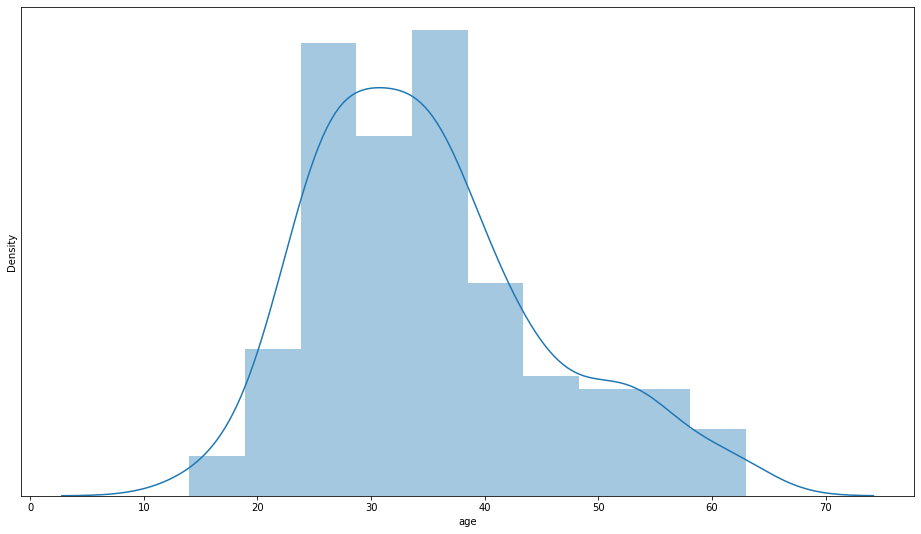

In [ ]:
cluster_user_des(cl4_users)